## Día 2
Referencias :
1.[TEQS](https://github.com/The-Eigensolvers/TEQS)
2.[Qiskit textbook](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)

In [1]:
import numpy as np

#### Matrices

In [2]:
from sympy import Matrix

# Función para visualizar matrices
def view(M,name=''):
    display(name,Matrix(M))

In [3]:
A = np.array([ [1,2,3], [4,5,6], [7,8,9] ])
print("A: \n",A)

B = np.array([ [1,0,0], [0,1,0], [0,0,1] ])
view(B, "B:")

A: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


'B:'

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [10]:
# Multiplicación de matrices 

view(A*B,"A*B") 
view(A@B,"A·B") # Para dos dimensiones es lo mismo que np.dot()
view(np.dot(A,B),"dot(A,B)")

'A*B'

Matrix([
[1, 0, 0],
[0, 5, 0],
[0, 0, 9]])

'A·B'

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

'dot(A,B)'

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

#### Operadores lineales

In [9]:
# X Gate

X = np.array([[0,1],[1,0]])
view(X,"X gate")

Zero = np.array([1,0])
One = np.array([0,1])

view(X@Zero,'X|0>')
view(One,'|1>')

'X gate'

Matrix([
[0, 1],
[1, 0]])

'X|0>'

Matrix([
[0],
[1]])

'|1>'

Matrix([
[0],
[1]])

In [11]:
# Matrix hermítica conjugada
A = np.array([ [0+1j, 1+2j], [3+0j, 0-1j] ])
view(A,"A:")

view(A.conj(),"A conjugada")
view(A.conj().transpose(),"A conjugada transpuesta")

'A:'

Matrix([
[1.0*I, 1.0 + 2.0*I],
[  3.0,      -1.0*I]])

'A conjugada'

Matrix([
[-1.0*I, 1.0 - 2.0*I],
[   3.0,       1.0*I]])

'A conjugada transpuesta'

Matrix([
[     -1.0*I,   3.0],
[1.0 - 2.0*I, 1.0*I]])

In [12]:
# Hagamoslo con una función

def adjunta(M):
    return M.conj().transpose()

view(adjunta(A),"A^+")

'A^+'

Matrix([
[     -1.0*I,   3.0],
[1.0 - 2.0*I, 1.0*I]])

#### Valores/vectores propios

In [5]:
Y = np.array([[0,-1j],[1j,0]])
view(Y,"Y")

vals = np.linalg.eigvals(Y)
print("Valores propios: \n",vals)

vals_vecs = np.linalg.eigh(Y) # h es de Hermítica. Se explica con help abajo

print("Valores propios: \n",vals_vecs[0])
print("Vectores propios: \n",vals_vecs[1])

'Y'

Matrix([
[    0, -1.0*I],
[1.0*I,      0]])

Valores propios: 
 [ 1.+0.j -1.+0.j]
Valores propios: 
 [-1.  1.]
Vectores propios: 
 [[-0.70710678-0.j         -0.70710678+0.j        ]
 [ 0.        +0.70710678j  0.        -0.70710678j]]


In [14]:
X = np.array([[0,1],[1,0]])
view(X,"X")

vals_vecs = np.linalg.eigh(X)

print("Valores propios: \n",vals_vecs[0])
print("Vectores propios: \n",vals_vecs[1])

'X'

Matrix([
[0, 1],
[1, 0]])

Valores propios: 
 [-1.  1.]
Vectores propios: 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [15]:
help(np.linalg.eigh)

Help on function eigh in module numpy.linalg:

eigh(a, UPLO='L')
    Return the eigenvalues and eigenvectors of a complex Hermitian
    (conjugate symmetric) or a real symmetric matrix.
    
    Returns two objects, a 1-D array containing the eigenvalues of `a`, and
    a 2-D square array or matrix (depending on the input type) of the
    corresponding eigenvectors (in columns).
    
    Parameters
    ----------
    a : (..., M, M) array
        Hermitian or real symmetric matrices whose eigenvalues and
        eigenvectors are to be computed.
    UPLO : {'L', 'U'}, optional
        Specifies whether the calculation is done with the lower triangular
        part of `a` ('L', default) or the upper triangular part ('U').
        Irrespective of this value only the real parts of the diagonal will
        be considered in the computation to preserve the notion of a Hermitian
        matrix. It therefore follows that the imaginary part of the diagonal
        will always be treated as zero

In [21]:
vals_vecs[1][:,0]

array([-0.70710678,  0.70710678])

In [23]:
vals_vecs[1][:,1]

array([0.70710678, 0.70710678])

#### Operadores unitarios

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

In [129]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
view(H,"Hadamard")

view(adjunta(H)@H,"H·H^+")
view(H@adjunta(H),"H^+·H")

'Hadamard'

Matrix([
[0.707106781186547,  0.707106781186547],
[0.707106781186547, -0.707106781186547]])

'H·H^+'

Matrix([
[                  1.0, -2.23711431707574e-17],
[-2.23711431707574e-17,                   1.0]])

'H^+·H'

Matrix([
[                  1.0, -2.23711431707574e-17],
[-2.23711431707574e-17,                   1.0]])

In [138]:
vals_vecs = np.linalg.eigh(H)

print("Valores propios: \n",vals_vecs[0])

u_0 = vals_vecs[1][:,0]
view(u_0,"u_0")

view(H@u_0,"Hu_0")

Valores propios: 
 [-1.  1.]


'u_0'

Matrix([
[  0.38268343236509],
[-0.923879532511287]])

'Hu_0'

Matrix([
[-0.38268343236509],
[0.923879532511287]])

La compuerta cuántica más general de 1 qubit es la *Compuerta-U* y tiene la siguiente forma: 

$$U(\theta,\phi,\lambda) = \begin{bmatrix} \cos \frac{\theta}{2} & - e^{i\lambda}  \sin \frac{\theta}{2} \\  e^{i\phi}  \sin \frac{\theta}{2} & e^{i (\phi + \lambda)} \cos \frac{\theta}{2} \end{bmatrix}$$

**Pregunta** Para que valores de los parámetros se tienen las compuertas que hemos visto?

## Qiskit 

In [1]:
import numpy as np
from qiskit import QuantumCircuit

In [6]:
# Qué argumentos tiene la función que nos crea un circuito?
help(QuantumCircuit) 

Help on class QuantumCircuit in module qiskit.circuit.quantumcircuit:

class QuantumCircuit(builtins.object)
 |  QuantumCircuit(*regs, name=None, global_phase=0, metadata=None)
 |  
 |  Create a new circuit.
 |  
 |  A circuit is a list of instructions bound to some registers.
 |  
 |  Args:
 |      regs (list(:class:`Register`) or list(``int``) or list(list(:class:`Bit`))): The
 |          registers to be included in the circuit.
 |  
 |          * If a list of :class:`Register` objects, represents the :class:`QuantumRegister`
 |            and/or :class:`ClassicalRegister` objects to include in the circuit.
 |  
 |            For example:
 |  
 |              * ``QuantumCircuit(QuantumRegister(4))``
 |              * ``QuantumCircuit(QuantumRegister(4), ClassicalRegister(3))``
 |              * ``QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(2, 'qr1'))``
 |  
 |          * If a list of ``int``, the amount of qubits and/or classical bits to include in
 |            the cir

#### Circuitos básicos

In [9]:
qc = QuantumCircuit(1) # Creamos un circuito de un qubit
qc

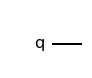

In [4]:
qc.draw('mpl') # Pintamos el circuito. Una linea indica un canal cuántico

#### Inicializar estados

In [10]:
Estado_inicial = [0,1] # |1>
qc.initialize(Estado_inicial,0)
qc.draw()

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

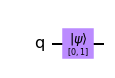

In [11]:
qc.draw('mpl')

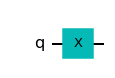

In [12]:
# Una forma equivalente de haber hecho lo de arriba es 
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

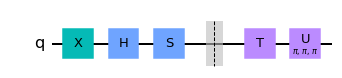

In [13]:
# Otras compuertas 
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.s(0) # No explicar
qc.barrier()
qc.t(0) # No explicar
qc.u(np.pi,np.pi,np.pi,0)
qc.draw('mpl')

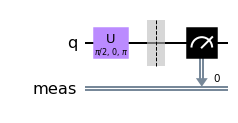

In [15]:
# Mediciones 
qc = QuantumCircuit(1)
qc.u(np.pi/2,0,np.pi,0)
qc.measure_all() # Doble línea indica un canal clásico
qc.draw('mpl')

**Por un premio: Cuál es la forma matricial de T?**
1. $$T =? \begin{bmatrix} 1 & 0 \\ 0 & i  \end{bmatrix}$$
2. $$T =? \begin{bmatrix} 1 & 0 \\ 0 & -i  \end{bmatrix}$$
3. $$T =? \begin{bmatrix} 1 & 0 \\ 0 & \frac{1+i}{\sqrt{2}}  \end{bmatrix}$$
4. $$T =? \begin{bmatrix} 1 & 0 \\ 0 & \frac{1-i}{\sqrt{2}}  \end{bmatrix}$$